### 15. UNDERSTANDING EXPERIMENTAL DATA

In [1]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, m = line.split(' ')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

In [2]:
def plotData(inputFile):
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
    label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

In [3]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
    label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    #find linear fit
    a,b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces) + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances,
    label = 'Displacements predicted by\nlinear fit, k = '
    + str(round(k, 5)))
    pylab.legend(loc = 'best')

In [6]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    #Get array containing mean height at each distance
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/len(heights)
    pylab.title('Trajectory of Projectile (Mean of '\
    + str(numTrials) + ' Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'b', label = 'Linear Fit')
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')
    pylab.legend()

In [7]:
def rSquared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
    predicted a one-dimensional array of predicted values
    Returns coefficient of determination"""
    estimateError = ((predicted - measured)**2).sum()
    meanOfMeasured = measured.sum()/float(len(measured))
    variability = ((measured - meanOfMeasured)**2).sum()
    return 1 - estimateError/variability

In [9]:
def getHorizontalSpeed(a, b, c, minX, maxX):
    """Assumes minX and maxX are distances in inches
    Returns horizontal speed in feet per second"""
    inchesPerFoot = 12.0
    xMid = (maxX - minX)/2.0
    yPeak = a*xMid**2 + b*xMid + c
    g = 32.16*inchesPerFoot #accel. of gravity in inches/sec/sec
    t = (2*yPeak/g)**0.5
    print('Horizontal speed =', int(xMid/(t*inchesPerFoot)), 'feet/sec')

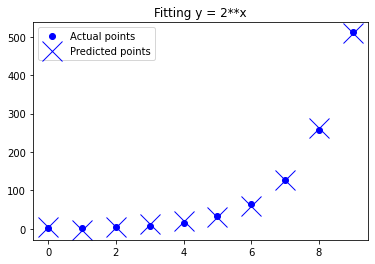

In [11]:
import pylab
vals = []
for i in range(10):
    vals.append(2**i)
pylab.plot(vals,'bo', label = 'Actual points')
xVals = pylab.arange(10)
a,b,c,d,e = pylab.polyfit(xVals, vals, 4)
yVals = a*(xVals**4) + b*(xVals**3) + c*(xVals**2)+ d*xVals + e
pylab.plot(yVals, 'bx', label = 'Predicted points', markersize = 20)
pylab.title('Fitting y = 2**x')
pylab.legend()  

In [12]:
pred2to20 = a*(20**4) + b*(20**3) + c*(20**2)+ d*20 + e
print('Model predicts that 2**20 is roughly', round(pred2to20))
print('Actual value of 2**20 is', 2**20)

Model predicts that 2**20 is roughly 29796
Actual value of 2**20 is 1048576


[]

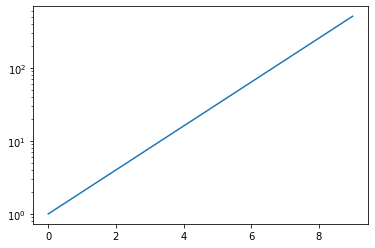

In [13]:
xVals, yVals = [], []
for i in range(10):
    xVals.append(i)
    yVals.append(2**i)
pylab.plot(xVals, yVals)
pylab.semilogy()

f(20) = 50331648.0
Predicted f(20) = 50331647.999999814


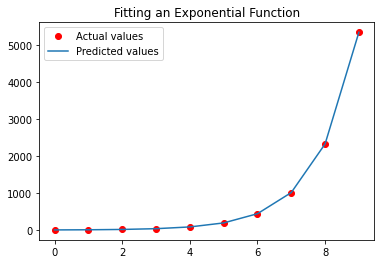

In [16]:
import math
#define an arbitrary exponential function
def f(x):
    return 3*(2**(1.2*x))
def createExpData(f, xVals):
    """Asssumes f is an exponential function of one argument
    xVals is an array of suitable arguments for f
    Returns array containing results of applying f to the
    elements of xVals"""
    yVals = []
    for i in range(len(xVals)):
        yVals.append(f(xVals[i]))
    return pylab.array(xVals), pylab.array(yVals)

def fitExpData(xVals, yVals):
    """Assumes xVals and yVals arrays of numbers such that
    yVals[i] == f(xVals[i])
    Returns a, b, base such that log(f(x), base) == ax + b"""
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) #get log base 2
    a,b = pylab.polyfit(xVals, logVals, 1)
    return a, b, 2.0
xVals, yVals = createExpData(f, range(10))
pylab.plot(xVals, yVals, 'ro', label = 'Actual values')
a, b, base = fitExpData(xVals, yVals)
predictedYVals = []
for x in xVals:
    predictedYVals.append(base**(a*x + b))
pylab.plot(xVals, predictedYVals, label = 'Predicted values')
pylab.title('Fitting an Exponential Function')
pylab.legend()
#Look at a value for x not in original data
print ('f(20) =', f(20))
print ('Predicted f(20) =', base**(a*20 + b))